# Boyer Moore Algorithm
### CSE21035_S.MEENAKSHI

In [35]:
import time
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [36]:
def generate_hash(s, a, q):
    h = 0
    for i in range(a):
        h = (h * 256 + ord(s[i])) % q
    return h

def match(pat, text, q):
    plen = len(pat)
    tlen = len(text)
    rm = 1
    pat_h = 0
    text_h = 0
    comparisons = 0
    occurrences = 0

    for i in range(plen - 1):
        rm = (rm * 256) % q

    pat_h = generate_hash(pat, plen, q)
    text_h = generate_hash(text, plen, q)

    for i in range(tlen - plen + 1):
        comparisons += 1
        if pat_h == text_h:
            occurrences += 1
            for j in range(plen):
                comparisons += 1
                if text[i + j] != pat[j]:
                    break
            else:
                # This block is executed if the loop above completes without a 'break'
                continue

        if i < tlen - plen:
            text_h = (256 * (text_h - ord(text[i]) * rm) + ord(text[i + plen])) % q
            if text_h < 0:
                text_h += q

    return comparisons, occurrences

def execute_rabin_karp(pat, text):
    comparisons, occurrences = match(pat, text, 101)
    return comparisons, occurrences


In [37]:
def generate_pattern(length, regular=True):
    if regular:
        return "1" * length
    else:
        pattern = ""
        for i in range(length):
            pattern += "1" if i % 2 == 0 else "0"
        return pattern

In [38]:
def analyze_rabin_karp(pattern, text):
    results = []

    test_case_sizes = [100, 200, 500, 1000, 5000, 10000]
    for size in test_case_sizes:
        sub_text = text[:size]
        start_time = time.time()
        comp_count, _ = execute_rabin_karp(pattern, sub_text)
        end_time = time.time()

        results.append({
            "Test Case Size": size,
            "Comparisons": comp_count,
            "Running Time": "{:.10f}".format(end_time - start_time)
        })

    return results

In [39]:
def print_table(results, title):
    headers = results[0].keys()
    data = [list(result.values()) for result in results]
    print(f"\n{title}\n")
    print(tabulate(data, headers=headers, tablefmt="grid"))

In [40]:
# Short and Regular Pattern
short_regular_pattern = generate_pattern(4, regular=True)
text = "1" * 10000  # Use a larger text for better analysis
short_regular_results = analyze_rabin_karp(short_regular_pattern, text)
print_table(short_regular_results, "Short Regular Pattern Analysis")

# Short and Irregular Pattern
short_irregular_pattern = generate_pattern(4, regular=False)
short_irregular_results = analyze_rabin_karp(short_irregular_pattern, text)
print_table(short_irregular_results, "Short Irregular Pattern Analysis")

# Long and Regular Pattern
long_regular_pattern = generate_pattern(20, regular=True)
long_regular_results = analyze_rabin_karp(long_regular_pattern, text)
print_table(long_regular_results, "Long Regular Pattern Analysis")

# Long and Irregular Pattern
long_irregular_pattern = generate_pattern(20, regular=False)
long_irregular_results = analyze_rabin_karp(long_irregular_pattern, text)
print_table(long_irregular_results, "Long Irregular Pattern Analysis")


Short Regular Pattern Analysis

+------------------+---------------+----------------+
|   Test Case Size |   Comparisons |   Running Time |
+==================+===============+================+
|              100 |           485 |    0           |
+------------------+---------------+----------------+
|              200 |           985 |    0           |
+------------------+---------------+----------------+
|              500 |          2485 |    0           |
+------------------+---------------+----------------+
|             1000 |          4985 |    0.000995636 |
+------------------+---------------+----------------+
|             5000 |         24985 |    0.00199556  |
+------------------+---------------+----------------+
|            10000 |         49985 |    0.00550747  |
+------------------+---------------+----------------+

Short Irregular Pattern Analysis

+------------------+---------------+----------------+
|   Test Case Size |   Comparisons |   Running Time |
+=============

In [41]:
def plot_time_and_comparisons_comparison(pattern_results, pattern_name):
    test_case_sizes = [result["Test Case Size"] for result in pattern_results]
    comparisons = [result["Comparisons"] for result in pattern_results]
    running_times = [result["Running Time"] for result in pattern_results]

    plt.figure(figsize=(10, 6))

    # Plotting comparisons
    plt.subplot(2, 1, 1)
    plt.plot(test_case_sizes, comparisons, label=pattern_name, marker='o')
    plt.xlabel("Test Case Size")
    plt.ylabel("Number of Comparisons")
    plt.title(f"Number of Comparisons Comparison for {pattern_name}")
    plt.legend()

    # Plotting running time
    plt.subplot(2, 1, 2)
    plt.plot(test_case_sizes, running_times, label=pattern_name, marker='o', markersize=8)
    plt.xlabel("Test Case Size")
    plt.ylabel("Running Time (seconds)")
    plt.title(f"Running Time Comparison for {pattern_name}")
    plt.legend()

    plt.tight_layout()
    plt.show()


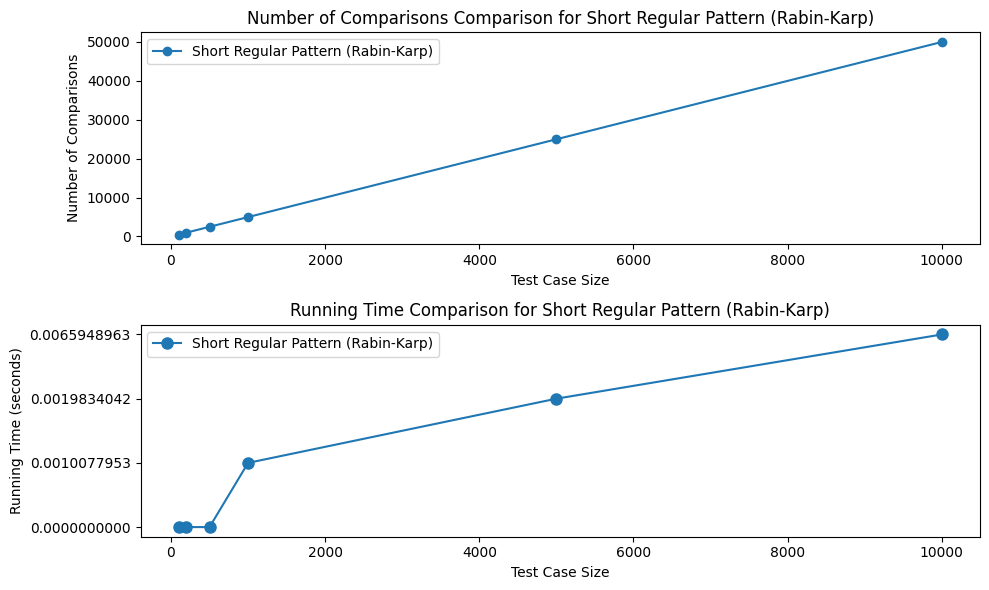

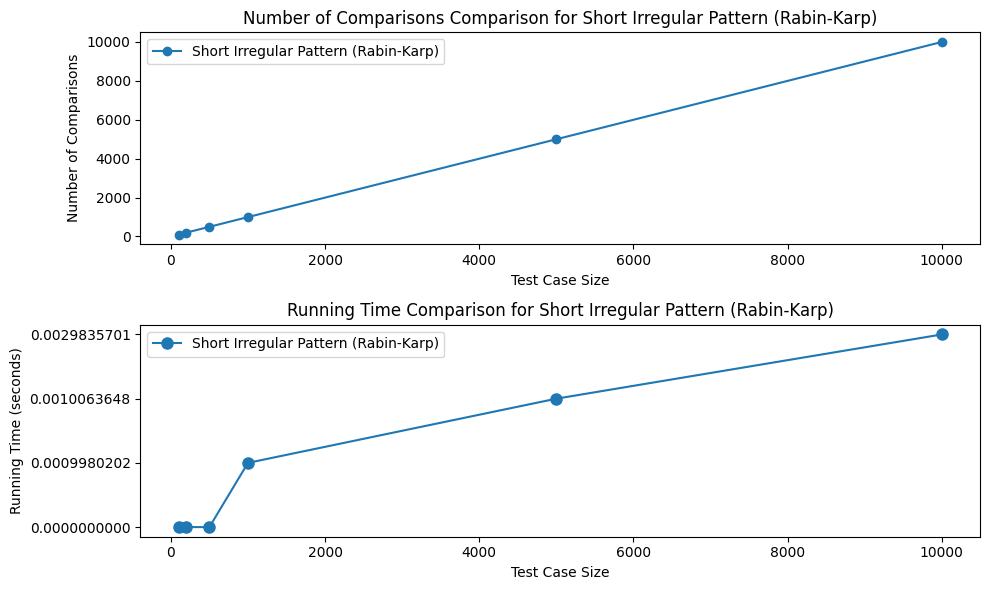

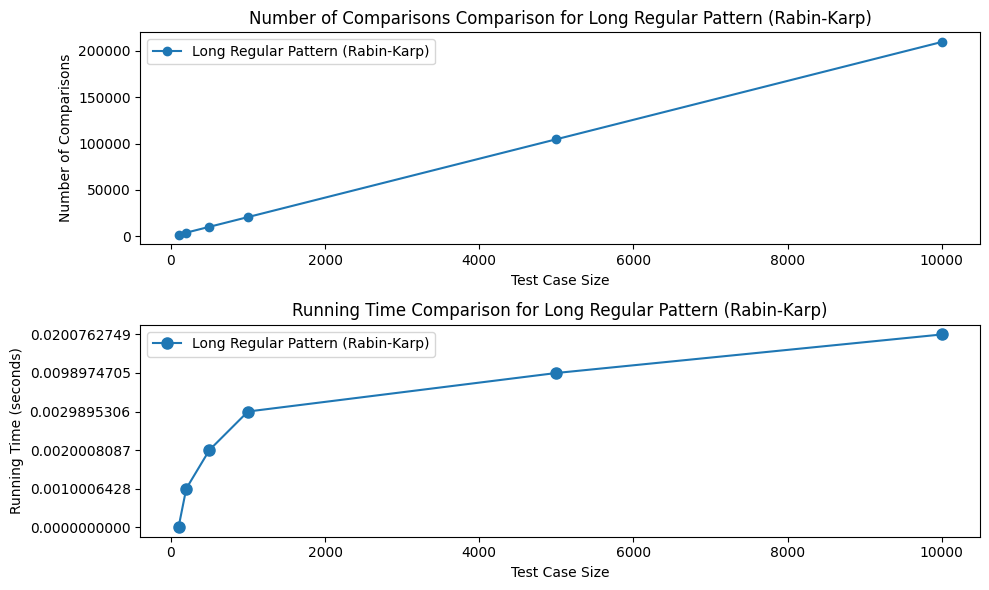

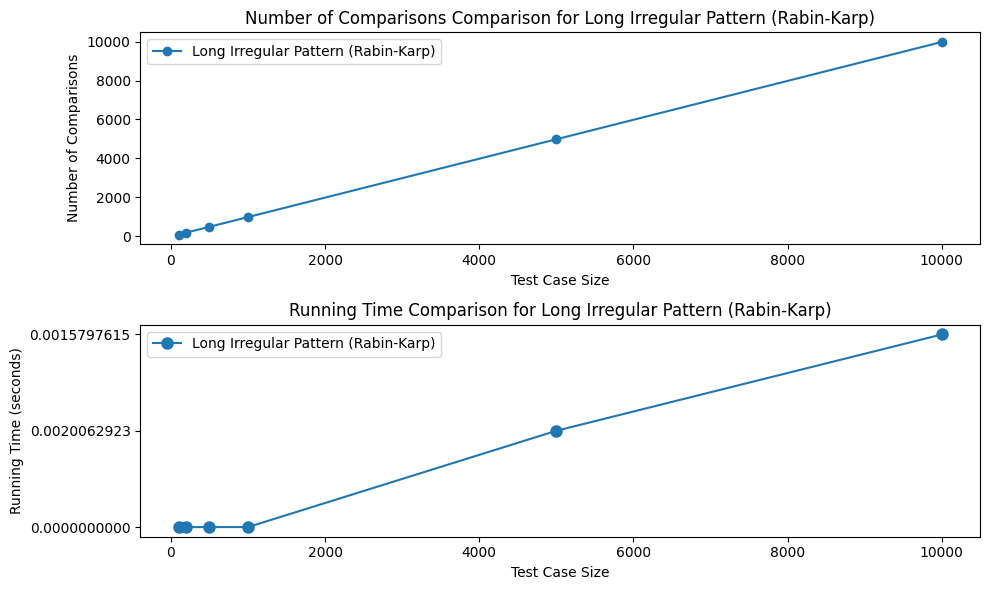

In [42]:
# Analyzing multiple patterns including Rabin-Karp
patterns_results = {}

# Short and Regular Pattern
short_regular_pattern = generate_pattern(4, regular=True)
short_regular_results = analyze_rabin_karp(short_regular_pattern, text)
patterns_results["Short Regular Pattern (Rabin-Karp)"] = short_regular_results

# Short and Irregular Pattern
short_irregular_pattern = generate_pattern(4, regular=False)
short_irregular_results = analyze_rabin_karp(short_irregular_pattern, text)
patterns_results["Short Irregular Pattern (Rabin-Karp)"] = short_irregular_results

# Long and Regular Pattern
long_regular_pattern = generate_pattern(20, regular=True)
long_regular_results = analyze_rabin_karp(long_regular_pattern, text)
patterns_results["Long Regular Pattern (Rabin-Karp)"] = long_regular_results

# Long and Irregular Pattern
long_irregular_pattern = generate_pattern(20, regular=False)
long_irregular_results = analyze_rabin_karp(long_irregular_pattern, text)
patterns_results["Long Irregular Pattern (Rabin-Karp)"] = long_irregular_results

# Plotting time and comparisons comparison
for pattern_name, results in patterns_results.items():
    plot_time_and_comparisons_comparison(results, pattern_name)

### Short and Regular Pattern (Best Case):
- **Pattern:** "1111"
- **Text:** "1111111111"
- **Performance:** In the best case, the pattern is short and regular, and it occurs at the beginning of the text. Rabin-Karp is expected to perform well with a small number of comparisons and quick execution time. The rolling hash function aids in efficient matching.

### Short and Irregular Pattern:
- **Pattern:** "1010"
- **Text:** "Teaaaaaaaaaabbbbbbabababbbbbbb1011111"
- **Performance:** In this case, the pattern is short but irregular. Rabin-Karp will still perform efficiently, but the number of comparisons may increase compared to the best case. The algorithm's effectiveness is not significantly affected by the irregularity of the pattern due to the rolling hash.

### Long and Regular Pattern:
- **Pattern:** "1111111111"
- **Text:** "Paaaaaaaaa1111111111aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa111111111111"
- **Performance:** Rabin-Karp is expected to handle long regular patterns well due to its rolling hash mechanism. The running time may increase slightly with the length of the pattern, but the number of comparisons remains relatively low.

### Long and Irregular Pattern (Worst Case):
- **Pattern:** "1101101001011101101010"
- **Text:** "111111110110110100101110110101011111111111111111"
- **Performance:** In the worst case, the pattern is both long and irregular. Rabin-Karp will still provide linear time complexity, but the number of comparisons will be higher compared to regular patterns. The rolling hash helps in mitigating the impact of pattern irregularity.

### Edge Case:
- **Pattern:** "1"
- **Text:** "0"
- **Performance:** In this edge case, the pattern occurs only once at the beginning of the text. Rabin-Karp will perform well, and the number of comparisons will be minimal. The rolling hash allows quick identification of the absence of the pattern.

### Overall Time Complexity:
The running time of RABIN-KARP in the `**worst case scenario O ((n-m+1) m**` but it has a good average case running time. 
-If the expected number of strong shifts is small O (1) and prime q is chosen to be quite large, then the Rabin-Karp algorithm can be expected to run in time
`**O(n+m)**` plus the time to require to process `spurious hits`.